In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data

path = r'/Users/peimei/09-2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated_2.pkl'))
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,no_of_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,price_mean,spending_flag,median_days_since_last_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<Axes: >

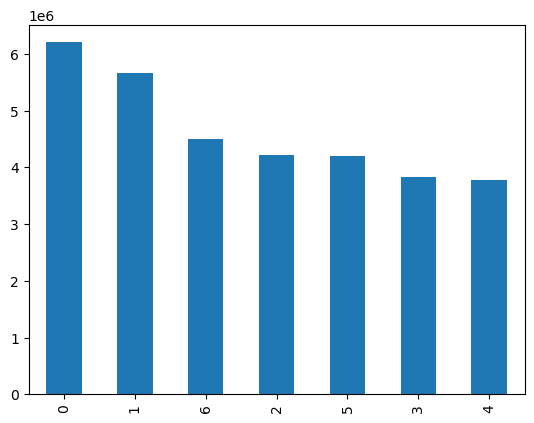

In [3]:
# Create a bar chart on "order_day_of_week"

ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: >

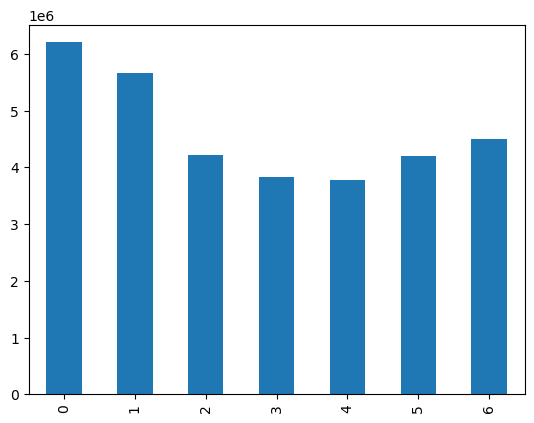

In [4]:
# Sort bars according to the index oder

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: >

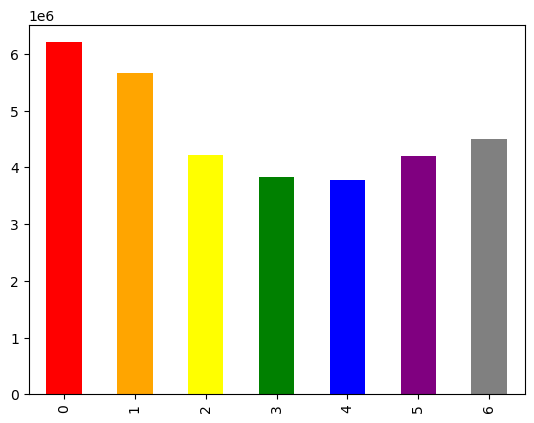

In [5]:
# Assign colors to the bars

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','orange','yellow','green','blue','purple','gray'])

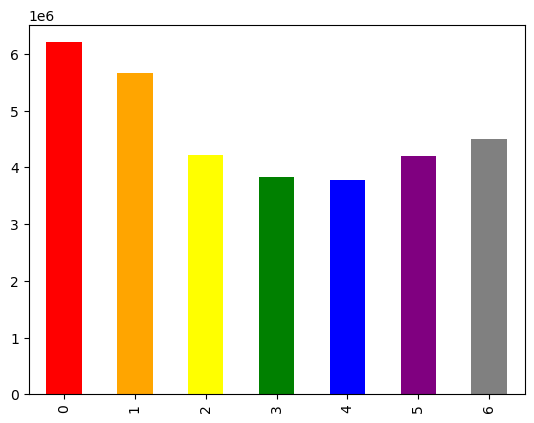

In [6]:
# Save as an object

bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','orange','yellow','green','blue','purple','gray'])

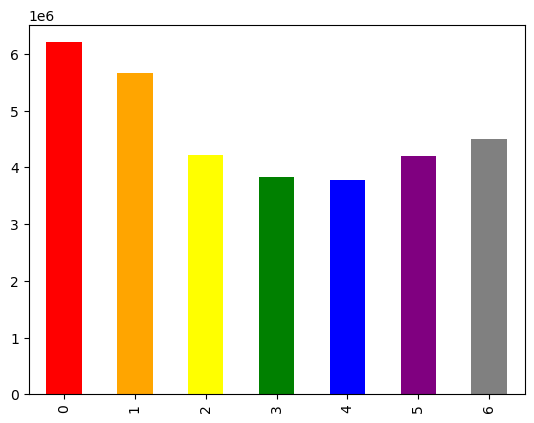

In [7]:
# Access the object

bar.figure

In [8]:
# Export it outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

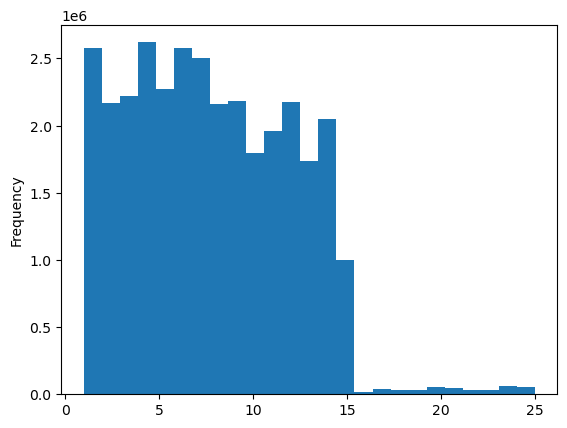

In [9]:
# Create a histogram of the column "prices"
# Outliers have been removed in the previous exercise!

ords_prods_merge['prices'].plot.hist(bins = 25)

### Create a scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

### Check for prices higher than 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

### Mark abnormal values as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

### Check whether the replacement was successful
ords_prods_merge['prices'].max()

<Axes: ylabel='Frequency'>

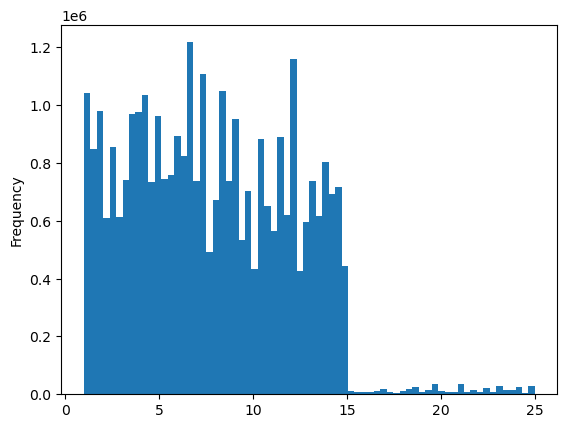

In [10]:
# Create another histogram with a higher level of granularity

ords_prods_merge['prices'].plot.hist(bins = 70)

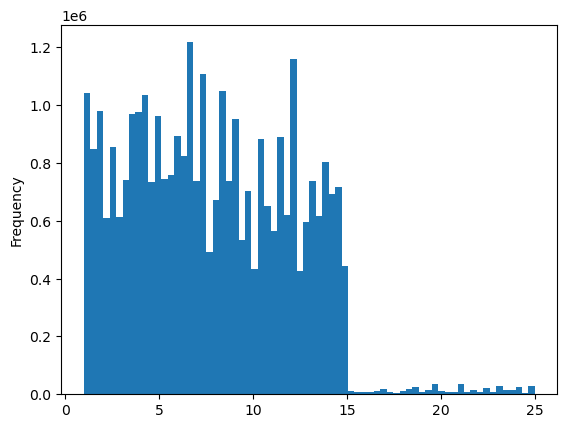

In [11]:
# Export viz

hist = ords_prods_merge['prices'].plot.hist(bins = 70)
hist.figure
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [12]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [13]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [14]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [15]:
# Confirm the output

len(ords_prods_merge)

32399732

In [16]:
len(big)+len(small)

32399732

In [17]:
# To speed up the processing time even further, reduce the samples to only those columns necessary for the chart

df_2 = small[['order_day_of_week','prices']]

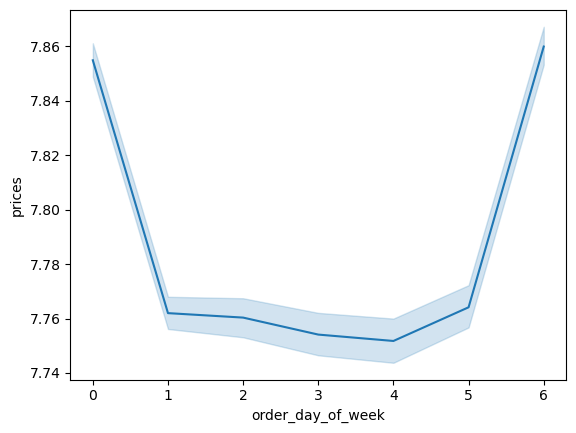

In [18]:
# Create a line chart

line_day_prices = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [19]:
# Export viz in the form of an .png file

line_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_day_prices.png'))